In [21]:
import argparse
from PIL import Image
from torchvision import transforms
import os

def resize_image(image_path):
    """
    Read an image, resize to 224x224 using torchvision transforms and save back to original location
    
    Args:
        image_path (str): Path to the input image
    """
    # Define transform
    transform = transforms.Compose([
        transforms.Resize((224, 224), antialias=True),
    ])
    
    # Read image using PIL
    try:
        img = Image.open(image_path)
    except Exception as e:
        raise ValueError(f"Could not read image at {image_path}: {str(e)}")
    
    # Apply resize transform
    img_resized = transform(img)
    
    # Save back to original location
    img_resized.save(image_path)
    print(f"Successfully resized image and saved to {image_path}")

resize_image("/home/brimax/repos/img-annotation-webapp/exmples/pneumonia.png")

Successfully resized image and saved to /home/brimax/repos/img-annotation-webapp/exmples/pneumonia.png


In [5]:
[1/5] * 5

[0.2, 0.2, 0.2, 0.2, 0.2]

In [4]:
import os

len(os.listdir("data/test/NORMAL")) // 5

46

In [22]:
import random
import shutil

def sample_and_copy_images(src_dir, dst_dir, n_samples=50):
    """
    Sample n_samples random images from src_dir and copy them to dst_dir
    
    Args:
        src_dir (str): Source directory containing images
        dst_dir (str): Destination directory to copy images to
        n_samples (int): Number of images to sample
    """
    # Create destination directory if it doesn't exist
    os.makedirs(dst_dir, exist_ok=True)
    
    # Get all image files from source directory
    valid_extensions = ('.png', '.jpg', '.jpeg', '.tiff', '.bmp')
    image_files = [f for f in os.listdir(src_dir) 
                  if f.lower().endswith(valid_extensions)]
    
    # Sample random images
    if len(image_files) < n_samples:
        print(f"Warning: Only {len(image_files)} images available, sampling all")
        sampled_files = image_files
    else:
        sampled_files = random.sample(image_files, n_samples)
    
    # Copy sampled images to destination
    for filename in sampled_files:
        src_path = os.path.join(src_dir, filename)
        dst_path = os.path.join(dst_dir, filename)
        shutil.copy2(src_path, dst_path)
        print(f"Copied {filename} to {dst_dir}")
    
    print(f"Successfully sampled and copied {len(sampled_files)} images")

# Example usage
src_dir = "/home/brimax/repos/medimg-saliency-benchmark/medimg-saliency-benchmark/data/test/PNEUMONIA"  # Replace with your source folder path
dst_dir = "/home/brimax/repos/img-annotation-webapp/static/img"  # Replace with your destination folder path
sample_and_copy_images(src_dir, dst_dir, n_samples=50)

Copied person120_bacteria_572.jpeg to /home/brimax/repos/img-annotation-webapp/static/img
Copied person1672_virus_2888.jpeg to /home/brimax/repos/img-annotation-webapp/static/img
Copied person136_bacteria_649.jpeg to /home/brimax/repos/img-annotation-webapp/static/img
Copied person1661_virus_2872.jpeg to /home/brimax/repos/img-annotation-webapp/static/img
Copied person62_virus_119.jpeg to /home/brimax/repos/img-annotation-webapp/static/img
Copied person83_bacteria_414.jpeg to /home/brimax/repos/img-annotation-webapp/static/img
Copied person1664_virus_2877.jpeg to /home/brimax/repos/img-annotation-webapp/static/img
Copied person147_bacteria_706.jpeg to /home/brimax/repos/img-annotation-webapp/static/img
Copied person48_virus_100.jpeg to /home/brimax/repos/img-annotation-webapp/static/img
Copied person78_bacteria_385.jpeg to /home/brimax/repos/img-annotation-webapp/static/img
Copied person109_bacteria_528.jpeg to /home/brimax/repos/img-annotation-webapp/static/img
Copied person60_virus_1

In [27]:
from torchvision.models import googlenet, resnet101, vgg16, alexnet

model = vgg16()
# list(model.children())
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [9]:
from models import InceptionNetBinary

model = InceptionNetBinary(pretrained=False, gap=True)
model

/home/brimax/miniconda3/envs/f1/lib/python3.12/site-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


InceptionNetBinary(
  (model): Inception3(
    (Conv2d_1a_3x3): BasicConv2d(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_2a_3x3): BasicConv2d(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_2b_3x3): BasicConv2d(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (Conv2d_3b_1x1): BasicConv2d(
      (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_4a_3x3)

Init train dataset with 3875 PNEUMONIA images and 1341 NORMAL images.
Init test dataset with 390 PNEUMONIA images and 234 NORMAL images.


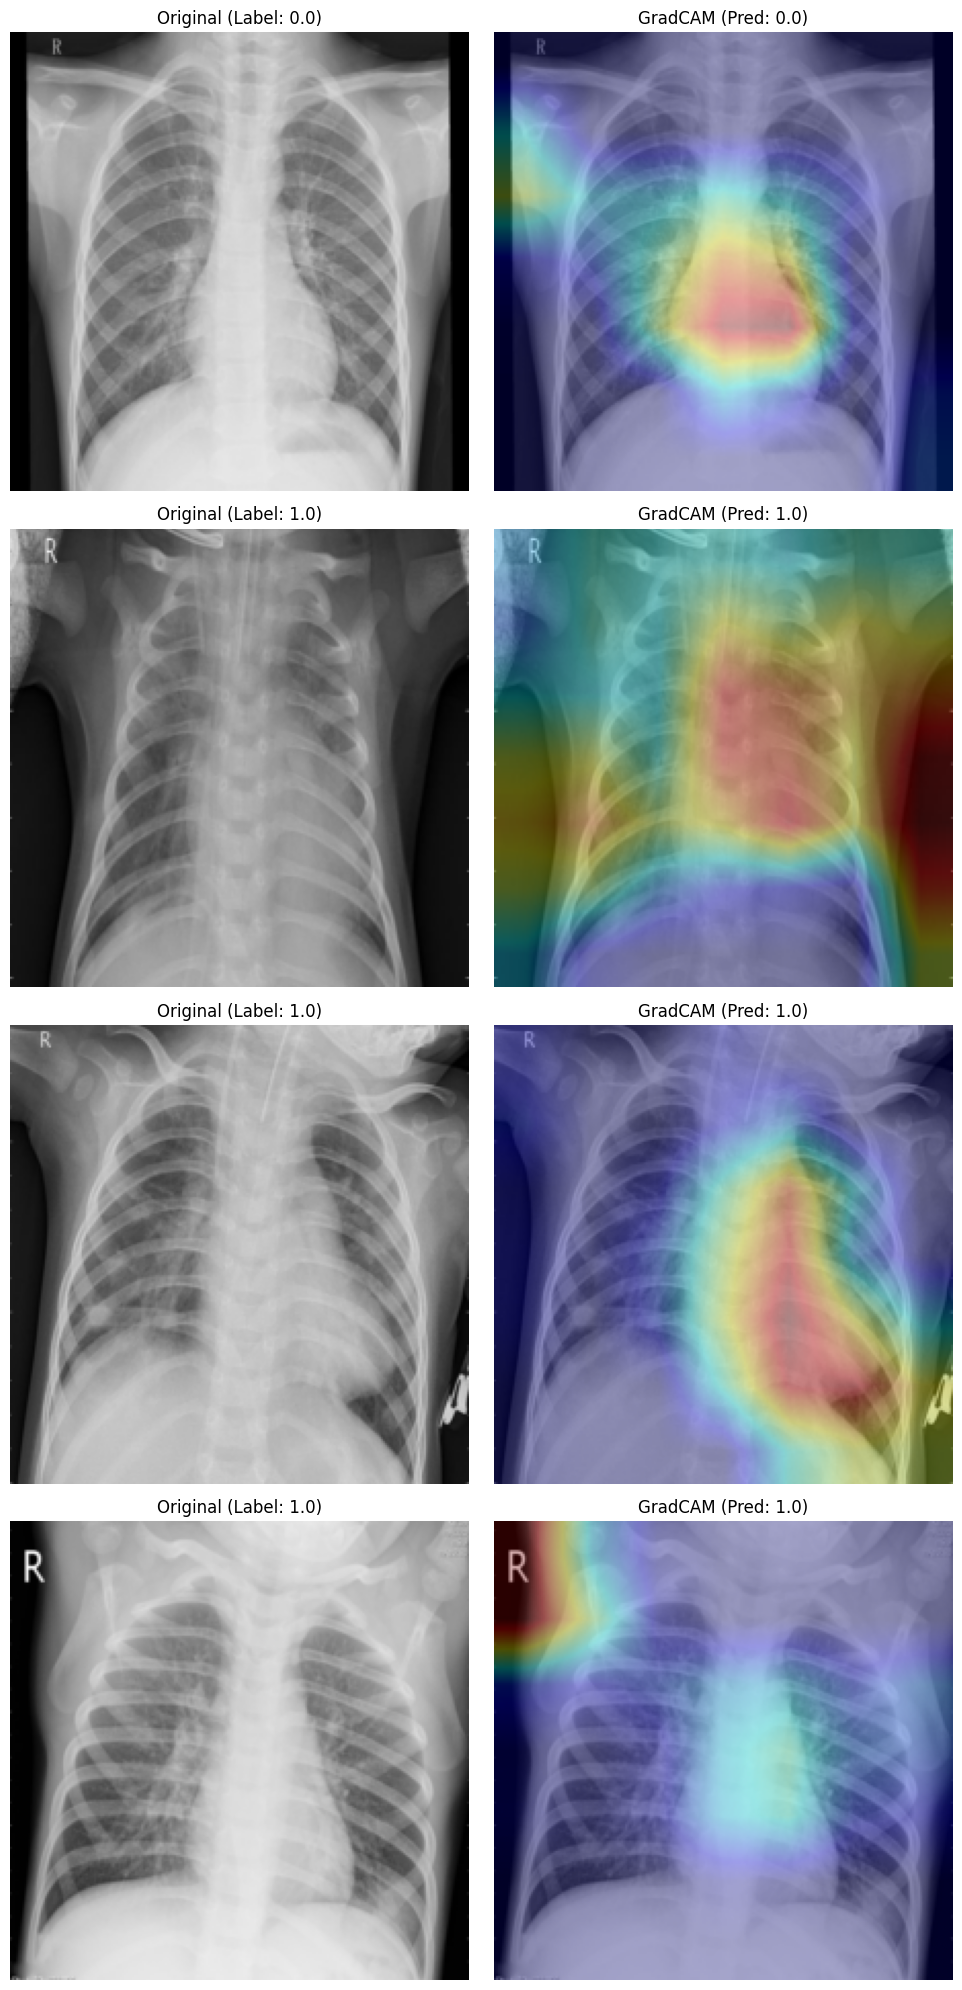

In [19]:
import datamodule
import models
import saliency
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.pyplot as plt
from utils import BaseConfig
import torch

reload(datamodule)
reload(models)
reload(saliency)

PATH_TO_CKPT = "/home/brimax/repos/medimg-saliency-benchmark/medimg-saliency-benchmark/checkpoints/rn_0.12.ckpt"
ALPHA = 0.3
N = 4  # Number of images to sample
device = "cuda" if torch.cuda.is_available() else "cpu"

def overlay_gradcam_on_image(img_tensor, cam, alpha=0.5):
    # img_tensor: shape [1, 3, H, W] (unnormalized, float [0,1])
    img_np = img_tensor.squeeze(0).detach().cpu().numpy()  # [3, H, W]
    img_np = np.transpose(img_np, (1, 2, 0))      # [H, W, 3]
    img_np = (img_np * 255).astype(np.uint8)

    # Resize cam to match image size
    cam_resized = cv2.resize(cam, (img_np.shape[1], img_np.shape[0]))
    heatmap = cv2.applyColorMap(np.uint8(255 * cam_resized), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Blend heatmap with original image
    overlay = cv2.addWeighted(img_np, 1 - alpha, heatmap, alpha, 0)
    return overlay

config = BaseConfig("./config.json")
dm = datamodule.Datamodule(config)
dm.setup()
dl = dm.test_dataloader()

# Sample N random indices
indices = np.random.choice(len(dm.test_ds), N, replace=False)

# Fetch the corresponding batch of images
images = []
labels = []
for idx in indices:
    X, y = dm.test_ds[idx]
    images.append(X)
    labels.append(y)

# Convert lists to tensors
X = torch.stack(images).to(device)
y = torch.tensor(labels).to(device)

model = models.BaseCNN.load_from_checkpoint(PATH_TO_CKPT).to(device)
model.eval()
pred = model.predict(X)

gcam = saliency.GradCAM(model.model)
cams = []
model.to(device)
gcam = saliency.GradCAM(model.model)
for i in range(N):
    single_cam = gcam(X[[i]])  # Add batch dimension with X[[i]]
    cams.append(single_cam)
# Plotting
fig, axes = plt.subplots(N, 2, figsize=(10, 5*N))  # Adjust figure size as needed

for i in range(N):
    # Original Image
    img = X[i].permute(1, 2, 0).cpu().numpy()
    img = (img * 255).astype(np.uint8)
    axes[i, 0].imshow(img)
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f"Original (Label: {y[i].item()})")

    # GradCAM Overlay
    overlay = overlay_gradcam_on_image(X[i:i+1], cams[i], alpha=ALPHA)
    axes[i, 1].imshow(overlay)
    axes[i, 1].axis('off')
    axes[i, 1].set_title(f"GradCAM (Pred: {pred[i].item()})")

plt.tight_layout()
plt.show()

<Axes: >

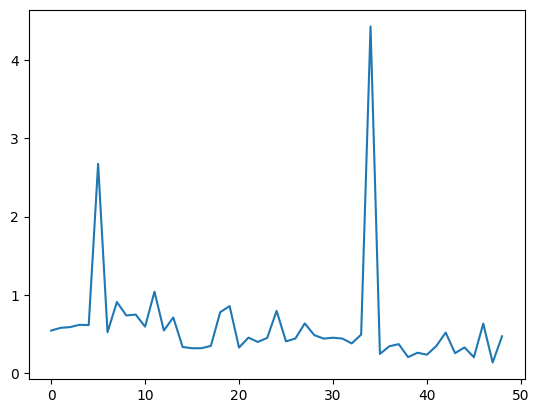

In [1]:
import pandas as pd

ans = pd.read_csv("/home/brimax/repos/medimg-saliency-benchmark/medimg-saliency-benchmark/lightning_logs/version_4/metrics.csv")

ans["train/loss"].plot()